### CSE-221710304051-Sanjana

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
type(train_labels)

numpy.ndarray

In [4]:
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

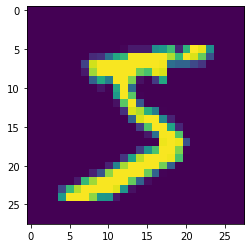

In [6]:
plt.imshow(train_digits[0])

In [7]:
sample=np.random.randint(train_digits.shape[0],size=16)
sample

array([59154, 25577, 18404, 19628, 58628, 22787, 26916, 59962,  8551,
       32510, 25098, 48701,  1320, 30230, 28175,  2493])

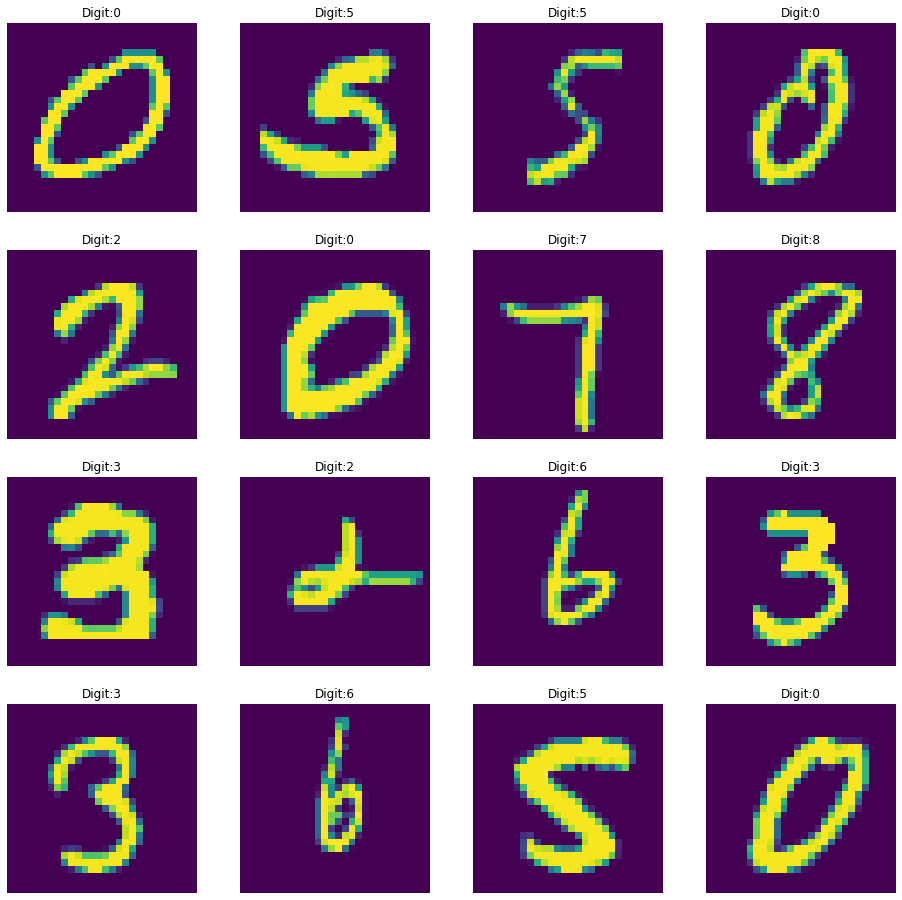

In [8]:
plt.figure(figsize=(16,16))
j=1
for i in sample:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j += 1

In [9]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [10]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [11]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat=to_categorical(test_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


Model 1

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 152us/step - loss: 0.2476 - accuracy: 0.9240 - val_loss: 0.1422 - val_accuracy: 0.9583
Epoch 2/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.1114 - accuracy: 0.9658 - val_loss: 0.1193 - val_accuracy: 0.9690
Epoch 3/5
54000/54000 [==============================] - 8s 139us/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.1133 - val_accuracy: 0.9688
Epoch 4/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.0632 - accuracy: 0.9798 - val_loss: 0.0956 - val_accuracy: 0.9742
Epoch 5/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.1153 - val_accuracy: 0.9700


In [16]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.10012242634356953, 0.9728999733924866]

In [17]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [18]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.1073436e-08, 2.7222932e-06, 2.5475005e-05, 9.3217959e-06,
        5.0868903e-07, 3.7419145e-08, 1.0752378e-09, 9.9992597e-01,
        6.1116953e-07, 3.5442557e-05]], dtype=float32)

In [19]:
model.predict(test_digits_sc[:10])


array([[2.10733564e-08, 2.72228817e-06, 2.54749812e-05, 9.32179591e-06,
        5.08688515e-07, 3.74190030e-08, 1.07523368e-09, 9.99925971e-01,
        6.11168957e-07, 3.54425574e-05],
       [1.10532755e-11, 4.55920741e-08, 1.00000000e+00, 6.93509827e-09,
        5.34947434e-11, 1.14782364e-10, 9.07935272e-12, 1.69434911e-10,
        3.91155419e-09, 3.79436201e-13],
       [7.52645661e-08, 9.99559104e-01, 6.15834579e-05, 2.90731549e-07,
        3.54926924e-05, 1.11767731e-05, 6.46724802e-05, 5.69664626e-05,
        2.10210346e-04, 3.82093077e-07],
       [9.99991894e-01, 2.61315969e-10, 1.65721860e-06, 7.88455612e-09,
        9.39369443e-07, 1.20819585e-08, 4.75060369e-06, 6.55381953e-08,
        7.86899506e-08, 5.19177888e-07],
       [5.20395034e-08, 3.78422010e-05, 1.65482243e-06, 6.69838540e-09,
        9.99876380e-01, 6.82196514e-07, 1.42286683e-06, 5.19290006e-06,
        1.61863991e-05, 6.06219692e-05],
       [9.19794296e-10, 9.99983072e-01, 9.19999138e-07, 1.30280819e-09,
   

In [20]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [21]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.1073436e-08, 2.7222932e-06, 2.5475005e-05, 9.3217959e-06,
        5.0868903e-07, 3.7419145e-08, 1.0752378e-09, 9.9992597e-01,
        6.1116953e-07, 3.5442557e-05]], dtype=float32)

In [22]:
history.history

{'accuracy': [0.924, 0.96577775, 0.97524077, 0.9797593, 0.98303705],
 'loss': [0.24761715116434627,
  0.11139268370600486,
  0.08140111758490956,
  0.06320052832741015,
  0.05315383921010868],
 'val_accuracy': [0.9583333134651184,
  0.968999981880188,
  0.968833327293396,
  0.9741666913032532,
  0.9700000286102295],
 'val_loss': [0.14215304854263863,
  0.11933628461013238,
  0.11326457082480192,
  0.09560734839985768,
  0.11533055758941918]}

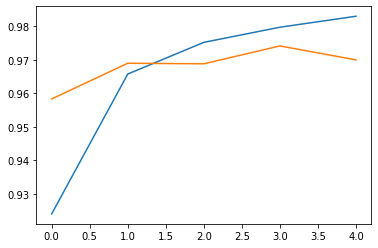

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Model 2

In [24]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [25]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 152us/step - loss: 0.2582 - accuracy: 0.9207 - val_loss: 0.1407 - val_accuracy: 0.9592
Epoch 2/5
54000/54000 [==============================] - 8s 147us/step - loss: 0.1121 - accuracy: 0.9655 - val_loss: 0.1124 - val_accuracy: 0.9667
Epoch 3/5
54000/54000 [==============================] - 8s 150us/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.1135 - val_accuracy: 0.9705
Epoch 4/5
54000/54000 [==============================] - 8s 153us/step - loss: 0.0634 - accuracy: 0.9799 - val_loss: 0.1099 - val_accuracy: 0.9707
Epoch 5/5
54000/54000 [==============================] - 8s 150us/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.1186 - val_accuracy: 0.9695


In [26]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 35us/step


[0.10826294855966698, 0.9717000126838684]

In [27]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [28]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3616425e-10, 1.3197588e-07, 9.6117151e-07, 3.3789722e-05,
        2.1591890e-09, 3.9549327e-08, 8.5020034e-13, 9.9985409e-01,
        1.8095839e-07, 3.9433930e-06]], dtype=float32)

In [29]:
model1.predict(test_digits_sc[:10])

array([[1.36165551e-10, 1.31975995e-07, 9.61167871e-07, 3.37895945e-05,
        2.15919327e-09, 3.95493274e-08, 8.50195457e-13, 9.99854088e-01,
        1.80957898e-07, 3.94338576e-06],
       [3.99829059e-06, 5.37624646e-06, 9.99921560e-01, 2.00456743e-05,
        1.56967853e-05, 2.29707643e-06, 7.97262965e-06, 1.28204611e-05,
        1.73307029e-07, 2.93358315e-09],
       [5.57204016e-09, 9.97960687e-01, 9.53825838e-06, 3.43254136e-08,
        1.04959622e-06, 1.86644257e-07, 1.29967928e-04, 3.52653615e-07,
        6.12072563e-06, 2.57500545e-07],
       [1.00000000e+00, 2.97566225e-13, 3.52581822e-08, 1.78911339e-08,
        4.65155736e-09, 3.30668769e-07, 1.02756749e-05, 1.61878649e-10,
        4.78455364e-09, 6.06138784e-08],
       [2.10425833e-06, 1.77353621e-04, 6.17251499e-06, 8.93996788e-09,
        9.96843994e-01, 8.19284907e-08, 1.95640132e-05, 3.89506931e-06,
        1.12167245e-05, 2.77972395e-05],
       [5.11220163e-11, 9.99642253e-01, 3.23731832e-08, 1.15654653e-09,
   

In [30]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [31]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3616425e-10, 1.3197588e-07, 9.6117151e-07, 3.3789722e-05,
        2.1591890e-09, 3.9549327e-08, 8.5020034e-13, 9.9985409e-01,
        1.8095839e-07, 3.9433930e-06]], dtype=float32)

In [32]:
history.history

{'accuracy': [0.9207037, 0.9655, 0.9757778, 0.9798704, 0.9836111],
 'loss': [0.25819078848179844,
  0.11210950565448513,
  0.08042707446881535,
  0.0634096690521196,
  0.05229306927939049],
 'val_accuracy': [0.9591666460037231,
  0.9666666388511658,
  0.9704999923706055,
  0.9706666469573975,
  0.9695000052452087],
 'val_loss': [0.1407479860112071,
  0.11243860180675984,
  0.11354426516902943,
  0.10989132479081551,
  0.11861960061856856]}

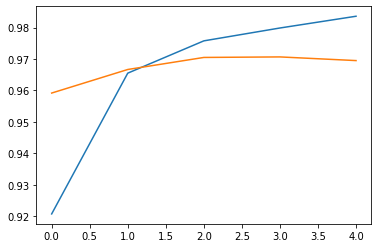

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- The accuarcy and Val_Accuracy of the model 1 is :[0.10071307541152345, 0.9724000096321106]

- The accuarcy andVal_Accuracy of the model 2 is :[0.10321083835801109, 0.9724000096321106]

- Hence model 2 is best than model 1